In [97]:
import wrf_management.plot.plot as wp
import os
import pandas as pd
from importlib import reload 
reload(wp)

<module 'wrf_management.plot.plot' from '/Users/diego/wrf_management/wrf_management/plot/plot.py'>

In [56]:
path = '/tmp/wrf_management/data_folder/runs/run_2019_02_20/2017_12_02/wrf/'
df = wp.get_df_list(path=path)

In [57]:
df.sample()

,,fn,p
date,d,,
2017-12-02 16:00:00,2,wrfout_d02_2017-12-02_16:00:00,/tmp/wrf_management/data_folder/runs/run_2019_...


In [68]:
_d4 = df.index.get_level_values('d')==4
df4 = df[_d4]

Int64Index([1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
            3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4,
            1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2,
            3, 4, 1, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3,
            4, 1, 2, 3, 4],
           dtype='int64', name='d')

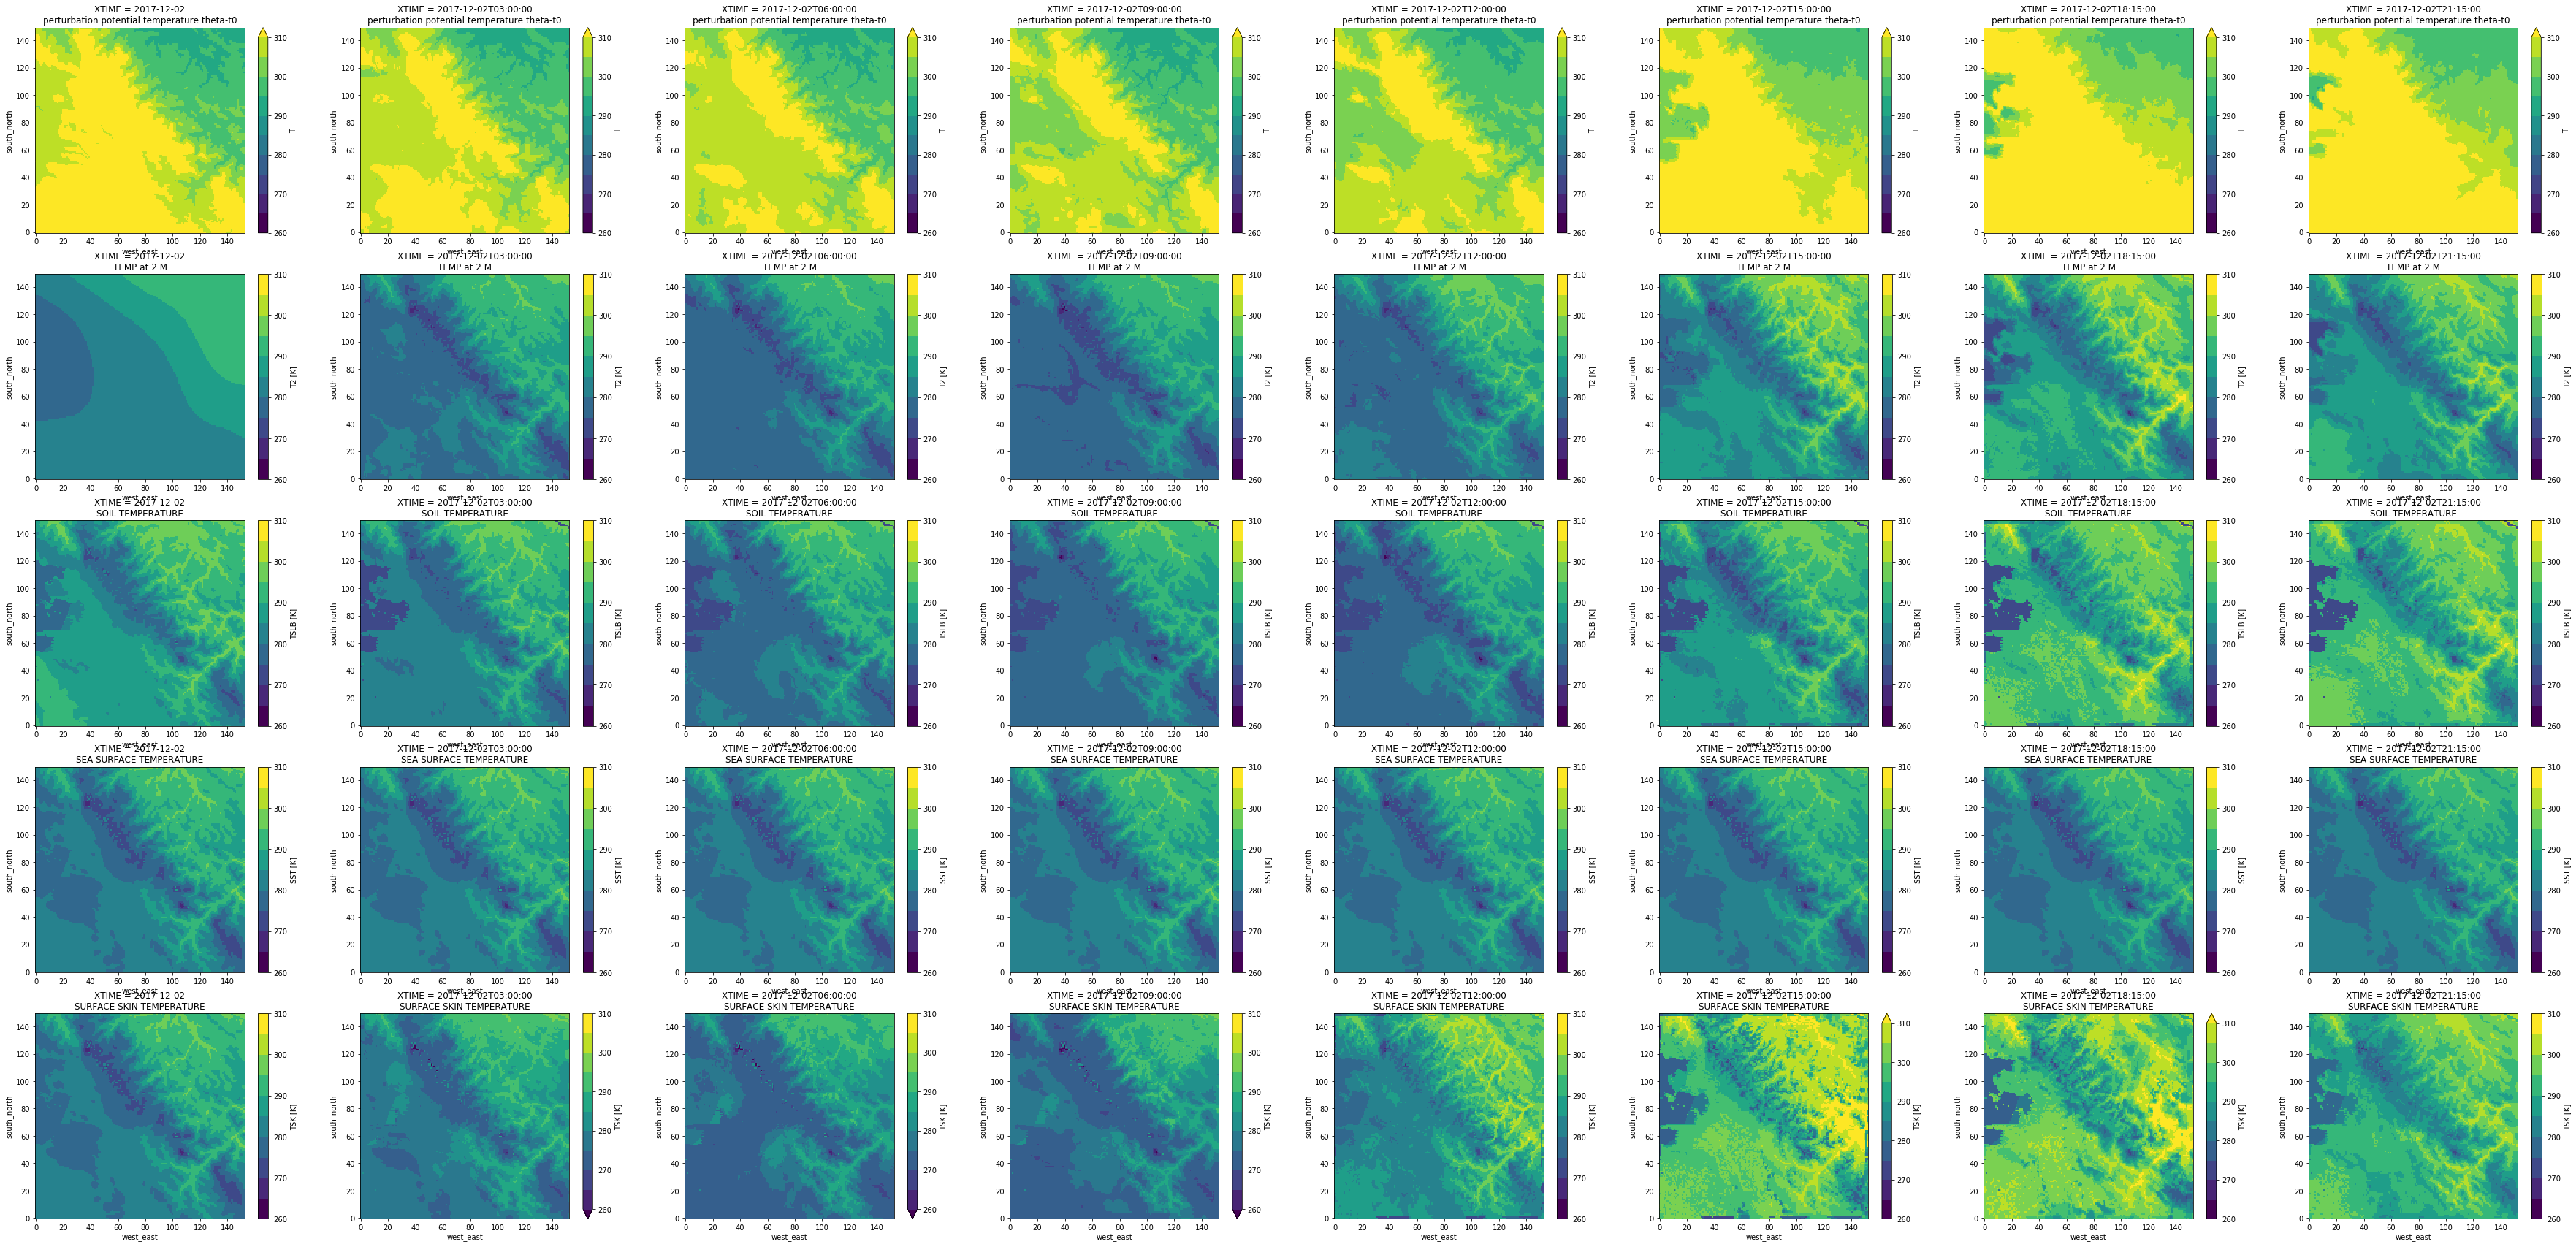

In [128]:
for d in [1,2,3,4]:
    _d4 = df.index.get_level_values('d')==d
    df4 = df[_d4]
    plist =['T','T2','TSLB', 'SST','TSK',]
    skim = ['T','TSLB']
    adjust=['T']
    vm,vM = 260,310
    lv = round((vM-vm)/5.)+1
    columns = [0,3,6,9,12,15,18,21]
    nn = 6
    fig = plt.figure(1,figsize=(1.3*nn*len(columns),nn*len(plist)))
    ll = 1 
    for l in plist:
        for c in columns:
            row = df4.iloc[c]
            ar = xr.open_dataset(row.p)
            ax = fig.add_subplot(len(plist),len(columns),ll)
            ar1 = ar[l]
            desc = ar1.description
            ar1 = ar1.isel(Time=0)
            if l in skim: ar1 = ar1[0]
            if l in adjust: ar1 = ar1+290
            ar1.plot(ax=ax,levels=lv, vmin =vm,vmax=vM)
            ax.set_title(ax.get_title()+
                         '\n'+
                         desc)
            ax.set_aspect('equal')
            ll = ll+1
    # fig.tight_layout()
    fig.savefig('./plot_temps'+str(d)'.jpg',dpi=300)

In [96]:
list(ar.variables)

['Times',
 'XLAT',
 'XLONG',
 'LU_INDEX',
 'ZNU',
 'ZNW',
 'ZS',
 'DZS',
 'VAR_SSO',
 'U',
 'V',
 'W',
 'PH',
 'PHB',
 'T',
 'THM',
 'HFX_FORCE',
 'LH_FORCE',
 'TSK_FORCE',
 'HFX_FORCE_TEND',
 'LH_FORCE_TEND',
 'TSK_FORCE_TEND',
 'MU',
 'MUB',
 'NEST_POS',
 'P',
 'PB',
 'FNM',
 'FNP',
 'RDNW',
 'RDN',
 'DNW',
 'DN',
 'CFN',
 'CFN1',
 'THIS_IS_AN_IDEAL_RUN',
 'P_HYD',
 'Q2',
 'T2',
 'TH2',
 'PSFC',
 'U10',
 'V10',
 'RDX',
 'RDY',
 'RESM',
 'ZETATOP',
 'CF1',
 'CF2',
 'CF3',
 'ITIMESTEP',
 'XTIME',
 'QVAPOR',
 'QCLOUD',
 'QRAIN',
 'QICE',
 'QSNOW',
 'QGRAUP',
 'SHDMAX',
 'SHDMIN',
 'SNOALB',
 'TSLB',
 'SMOIS',
 'SH2O',
 'SMCREL',
 'SEAICE',
 'XICEM',
 'SFROFF',
 'UDROFF',
 'IVGTYP',
 'ISLTYP',
 'VEGFRA',
 'GRDFLX',
 'ACGRDFLX',
 'ACSNOM',
 'SNOW',
 'SNOWH',
 'CANWAT',
 'SSTSK',
 'COSZEN',
 'LAI',
 'DTAUX3D',
 'DTAUY3D',
 'DUSFCG',
 'DVSFCG',
 'VAR',
 'CON',
 'OA1',
 'OA2',
 'OA3',
 'OA4',
 'OL1',
 'OL2',
 'OL3',
 'OL4',
 'TKE_PBL',
 'EL_PBL',
 'MAPFAC_M',
 'MAPFAC_U',
 'MAPFAC_V',
 'MAPF

In [100]:
reload(wp)
wp.print_var_starting_with(row.p,'')

Times - 
---------------
XLAT - LATITUDE, SOUTH IS NEGATIVE
---------------
XLONG - LONGITUDE, WEST IS NEGATIVE
---------------
LU_INDEX - LAND USE CATEGORY
---------------
ZNU - eta values on half (mass) levels
---------------
ZNW - eta values on full (w) levels
---------------
ZS - DEPTHS OF CENTERS OF SOIL LAYERS
---------------
DZS - THICKNESSES OF SOIL LAYERS
---------------
VAR_SSO - variance of subgrid-scale orography
---------------
U - x-wind component
---------------
V - y-wind component
---------------
W - z-wind component
---------------
PH - perturbation geopotential
---------------
PHB - base-state geopotential
---------------
T - perturbation potential temperature theta-t0
---------------
THM - either 1) pert moist pot temp=(1+Rv/Rd Qv)*(theta)-T0, or 2) pert dry pot temp=t
---------------
HFX_FORCE - SCM ideal surface sensible heat flux
---------------
LH_FORCE - SCM ideal surface latent heat flux
---------------
TSK_FORCE - SCM ideal surface skin temperature
----------

In [78]:
ar.isel(Time=0)['T00']

<xarray.DataArray 'T00' ()>
array(290., dtype=float32)
Coordinates:
    XTIME    datetime64[ns] ...
Attributes:
    FieldType:    104
    MemoryOrder:  0  
    description:  BASE STATE TEMPERATURE
    units:        K
    stagger:      

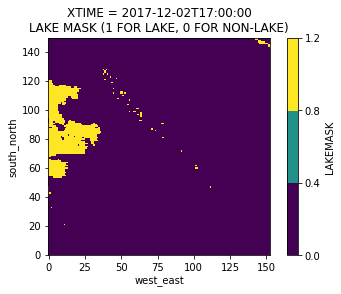

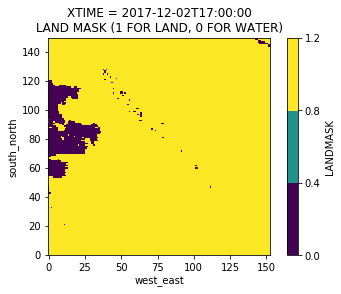

In [112]:
ar = xr.open_dataset(row.p)
plist =['LAKEMASK','LANDMASK']
skim = ['T','TSLB']
adjust=['T']
vm,vM = 260,310
lv = round((vM-vm)/5.)+1
for l in plist:
    fig, ax = plt.subplots()
    ar1 = ar[l]
    desc = ar1.description
    ar1 = ar1.isel(Time=0)
    if l in skim: ar1 = ar1[0]
    if l in adjust: ar1 = ar1+290
    ar1.plot(ax=ax,
             levels=4, 
#              vmin =vm,vmax=vM
            )
    ax.set_title(ax.get_title()+
                 '\n'+
                 desc)
    ax.set_aspect('equal')